In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

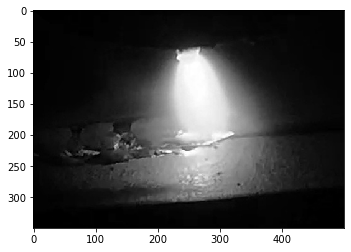

In [14]:
img = cv.imread('src/r.jpg')

plt.imshow(img)
plt.show()

True

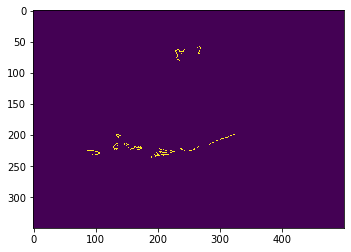

In [15]:
t1 = 250
t2 = t1 + 180
edges = cv.Canny(img, t1, t2)
plt.imshow(edges)
cv.imwrite('./output/edges.jpg', edges)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


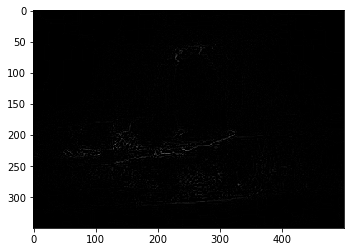

True

In [16]:
laplacian = cv.Laplacian(img, cv.CV_16S)
plt.imshow(laplacian)
plt.show()
cv.imwrite('./output/laplacian.jpg', laplacian)

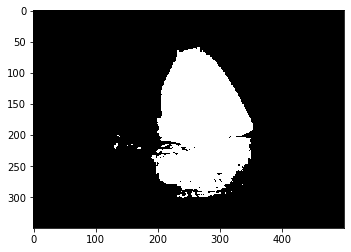

True

In [17]:
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()
cv.imwrite('./output/thresh.jpg', thresh1)

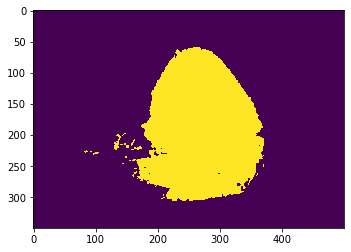

True

In [18]:
img = cv.imread('src/r.jpg', cv.CV_8UC1)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(th1)
plt.show()
cv.imwrite('./output/otsu.jpg', th1)

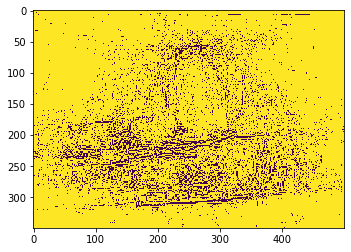

False

In [19]:
img = cv.imread('src/r.jpg', cv.CV_8UC1)
th1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 1)
plt.imshow(th1)
plt.show()
cv.imwrite('./putput/adapt_th1.jpg', th1)

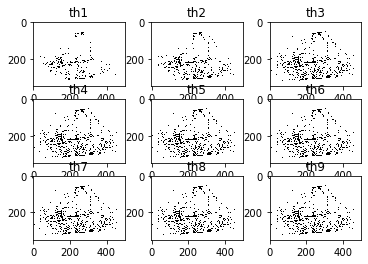

True

In [20]:
img = cv.imread('src/r.jpg', cv.CV_8UC1)

th1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 2)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 2)
th4 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 3)
th5 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 3)
th6 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 3)
th7 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 3, 4)
th8 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 4)
th9 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 4)

plt.subplot(331), plt.imshow(th1, 'gray'), plt.title('th1')
plt.subplot(332), plt.imshow(th2, 'gray'), plt.title('th2')
plt.subplot(333), plt.imshow(th3, 'gray'), plt.title('th3')
plt.subplot(334), plt.imshow(th3, 'gray'), plt.title('th4')
plt.subplot(335), plt.imshow(th3, 'gray'), plt.title('th5')
plt.subplot(336), plt.imshow(th3, 'gray'), plt.title('th6')
plt.subplot(337), plt.imshow(th3, 'gray'), plt.title('th7')
plt.subplot(338), plt.imshow(th3, 'gray'), plt.title('th8')
plt.subplot(339), plt.imshow(th3, 'gray'), plt.title('th9')

plt.savefig('output/plt.png', dpi = 300)
plt.show()

cv.imwrite('./output/adapt_th1.jpg', th1)
cv.imwrite('./output/adapt_th2.jpg', th2)
cv.imwrite('./output/adapt_th3.jpg', th3)
cv.imwrite('./output/adapt_th4.jpg', th4)
cv.imwrite('./output/adapt_th5.jpg', th5)
cv.imwrite('./output/adapt_th6.jpg', th6)
cv.imwrite('./output/adapt_th7.jpg', th7)
cv.imwrite('./output/adapt_th8.jpg', th8)
cv.imwrite('./output/adapt_th9.jpg', th9)

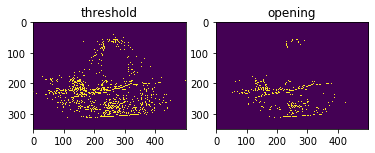

True

In [21]:
img = cv.imread('src/r.jpg', cv.CV_8UC1)
th = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 2)

# kernel = np.ones((3, 3), np.uint8)
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)

# 二值化反轉
th = cv.bitwise_not(th)

opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(th), plt.title('threshold')
plt.subplot(122), plt.imshow(opening), plt.title('opening')
plt.show()

cv.imwrite('./output/threshold1.jpg', th)
cv.imwrite('./output/opening.jpg', opening)

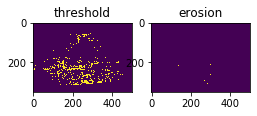

True

In [22]:
img = cv.imread('src/r.jpg', cv.CV_8UC1)
th = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 2)

th = cv.bitwise_not(th)

kernel = np.ones((3, 3), np.uint8)

erosion = cv.erode(th, kernel, iterations = 1)
dilation = cv.dilate(th, kernel, iterations = 1)

plt.subplot(131), plt.imshow(th), plt.title('threshold')
plt.subplot(132), plt.imshow(erosion), plt.title('erosion')
plt.show()

cv.imwrite('./output/threshold1.jpg', th)
cv.imwrite('./output/erosion1.jpg', erosion)

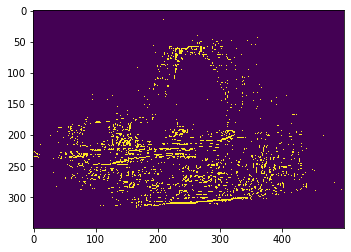

In [23]:
cnts, _ = cv.findContours(th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for pic, contour in enumerate(cnts):
    area = cv.contourArea(contour)
    if area > 10:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(th, (x, y), (x+w, y+h), (0, 255, 255), 2)

plt.imshow(th)

cv.waitKey(0)
cv.destroyAllWindows()

True

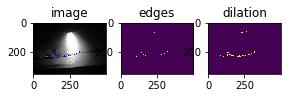

In [24]:
img = cv.imread('src/g.jpg')

t1 = 250
t2 = t1 + 180
edges = cv.Canny(img, t1, t2)

kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(edges, kernel, iterations = 1)

cnts, _ = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for pic, contour in enumerate(cnts):
    area = cv.contourArea(contour)
    x, y, w, h = cv.boundingRect(contour)
    img = cv.drawContours(img, contour, -1, (0, 0, 255), 2)

plt.subplot(141), plt.imshow(img), plt.title('image')
plt.subplot(142), plt.imshow(edges), plt.title('edges')
plt.subplot(143), plt.imshow(dilation), plt.title('dilation')

cv.imwrite('./output/image_output1.jpg', img)
cv.imwrite('./output/edges.jpg', edges)
cv.imwrite('./output/dilation1.jpg', dilation)